# Introduction to Supervised Learning

## Outline
Here we'll dive into the basic principles of machine learning, and how to
utilize them via the Scikit-Learn API.

After briefly introducing scikit-learn's *Estimator* object, we'll cover **supervised learning**, including *classification* and *regression* problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [2]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [3]:
model = LinearRegression(n_jobs=-1)
print(f'n_jobs parameter is set to: {model.n_jobs}')
print(model)

n_jobs parameter is set to: -1
LinearRegression(n_jobs=-1)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

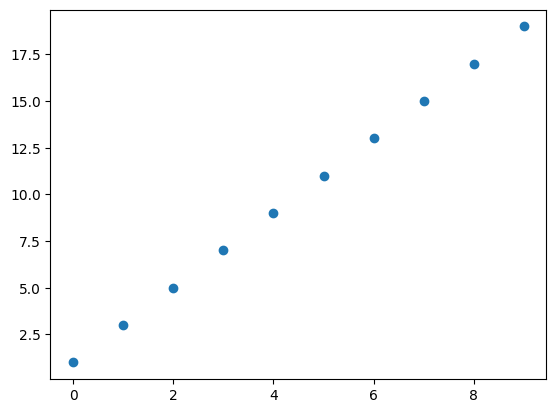

In [4]:
# Let's create some artificial data and let's plot them.
x = np.arange(10)
y = 2 * x + 1
plt.plot(x, y, 'o')

In [5]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [6]:
# fit the model on our data
model.fit(X, y)

LinearRegression(n_jobs=-1)

In [7]:
# underscore at the end indicates a fit parameter
print(f'The model found a line with slope {model.coef_} and intercept {model.intercept_}')

The model found a line with slope [2.] and intercept 0.9999999999999982


## Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

### Classification Example
K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [9]:
# Load the dataset and retrieve features and target
iris = load_iris()
X, y = iris.data, iris.target

In [10]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X, y)

KNeighborsClassifier()

What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal? call the *predict* method:

In [11]:
result = knn.predict([[3, 5, 4, 2],])
print(iris.target_names[result])

['versicolor']


You can also do probabilistic predictions calling the method *predict_proba*:

In [12]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

### Regression Example

One of the simplest regression problems is fitting a line to data, which we saw above.
Scikit-learn also contains more sophisticated regression algorithms.

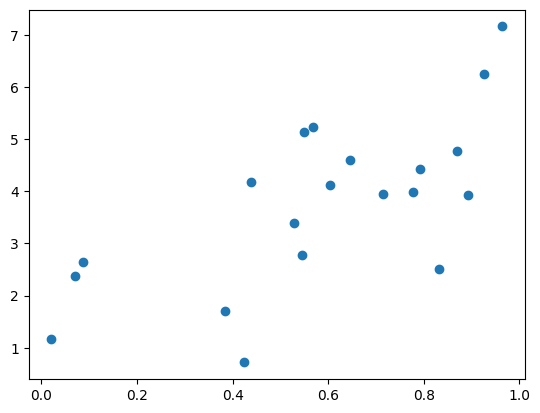

In [13]:
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)
plt.plot(X.squeeze(), y, 'o');

As above, we can plot a line of best fit:

In [14]:
# Create the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

LinearRegression()

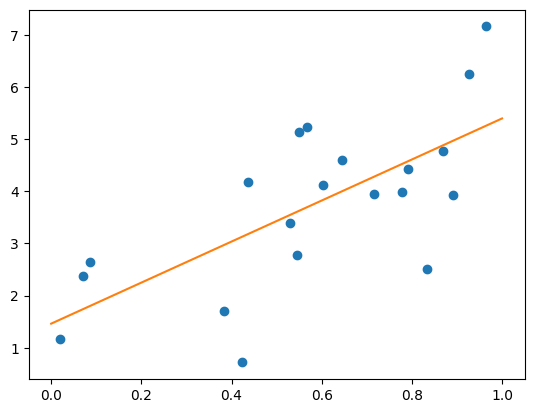

In [15]:
# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Scikit-learn also has some more sophisticated models, which can respond to finer features in the data:

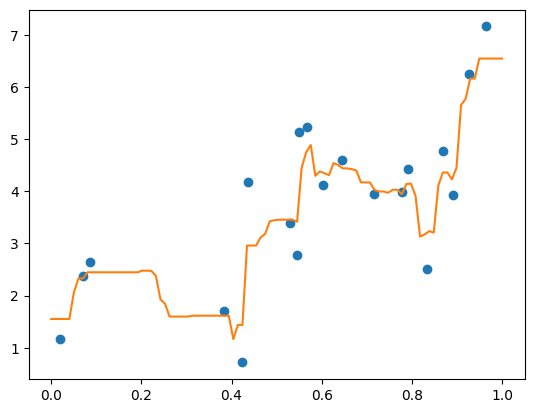

In [16]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);